In [55]:
import pandas as pd
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
os.chdir('C:\\Users\mattc\Downloads')
df = pd.read_csv('CyclistCrashes.csv')
df.head(3)

,CRASH_ID,CRASH_DATE,CRASH_TIME,SEVERITY,CRASH_TYPE,CYCLISTS,CYCLIST_CASUALTIES,REPORTED_LOCATION,LATITUDE,LONGITUDE,LOCATION_1
0,1034637,14 May 2012,12:37,Injury,Collision with parked vehicle,1,1,CAPITAL CIRCLE (COMMONWEALTH/COMMSPARLERM -> C...,-35.304932,149.125419,"(-35.304932, 149.125419)"
1,1055714,20 February 2013,07:57,Injury,Right turn into oncoming vehicle,1,1,MORPHETT/NORTHBOURNE INTERSECTION,-35.253575,149.133358,"(-35.253575, 149.133358)"
2,1083381,17 March 2014,07:30,Injury,Same direction side swipe,1,1,BUNDA/NORTHBOURNE/RUDD INTERSECTION,-35.277135,149.129453,"(-35.277135, 149.129453)"


In [58]:
geometry = [Point(xy) for xy in zip(df.LONGITUDE, df.LATITUDE)]
df = df.drop(['LONGITUDE', 'LATITUDE'], axis=1)
crs = {'init': 'epsg:4326'}
geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

,CRASH_ID,CRASH_DATE,CRASH_TIME,SEVERITY,CRASH_TYPE,CYCLISTS,CYCLIST_CASUALTIES,REPORTED_LOCATION,LOCATION_1,geometry
0,1034637,14 May 2012,12:37,Injury,Collision with parked vehicle,1,1,CAPITAL CIRCLE (COMMONWEALTH/COMMSPARLERM -> C...,"(-35.304932, 149.125419)",POINT (149.125419 -35.304932)
1,1055714,20 February 2013,07:57,Injury,Right turn into oncoming vehicle,1,1,MORPHETT/NORTHBOURNE INTERSECTION,"(-35.253575, 149.133358)",POINT (149.133358 -35.253575)
2,1083381,17 March 2014,07:30,Injury,Same direction side swipe,1,1,BUNDA/NORTHBOURNE/RUDD INTERSECTION,"(-35.277135, 149.129453)",POINT (149.129453 -35.27713499999999)
3,1025046,04 January 2012,08:50,Property Damage Only,Other - Vehicle to Vehicle,1,0,BARRY/COOYONG/NORTHBOURNE INTERSECTION,"(-35.275784, 149.129771)",POINT (149.129771 -35.275784)
4,1107433,07 April 2015,08:05,Property Damage Only,Other - Vehicle to Vehicle,1,0,NORTHBOURNE AVENUE (MORPHETT -> MURDOCH),"(-35.252917, 149.133364)",POINT (149.133364 -35.252917)


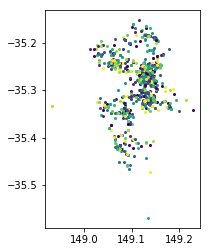

In [59]:
geo_df.plot()

In [60]:
tally = pd.DataFrame(df.groupby('REPORTED_LOCATION').count().loc[:,'CYCLISTS'])
tally.head()

,CYCLISTS
REPORTED_LOCATION,
A'BECKETT/KNOX (SW) INTERSECTION,1
ADELAIDE AVENUE (COTTEADELERM -> YARRA GLEN),2
ADELAIDE AVENUE (EMPIRE -> ADELWHOPESRM),1
ADELAIDE AVENUE (STATNADELWRM -> NATIONAL),1
ADELAIDE/ADELEHOPENRM INTERSECTION,1


In [61]:
dangerzones = pd.DataFrame(tally[tally['CYCLISTS'] > 2].index)
dangerzones.head()

,REPORTED_LOCATION
0,AINSLIE/LIMESTONE INTERSECTION
1,ALEXANDRINA/CORONATION/FLYNN INTERSECTION
2,ANTILL/MOUAT/NORTHBOURNE INTERSECTION
3,ATHLLON/BEASLEY (SW) INTERSECTION
4,ATHLLON/DRAKEFORD/ISABELLA INTERSECTION


In [64]:
test = geo_df['REPORTED_LOCATION'].isin(dangerzones['REPORTED_LOCATION'])


dangerzone_hits = geo_df[test]


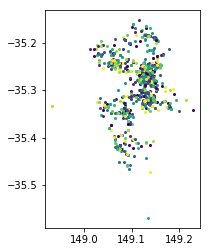

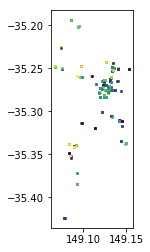

In [65]:
geo_df.plot()
dangerzone_hits.plot()

In [66]:
polygon_df = dangerzone_hits[['REPORTED_LOCATION','geometry']].sort_values('REPORTED_LOCATION')
polygon_df.head()

,REPORTED_LOCATION,geometry
180,AINSLIE/LIMESTONE INTERSECTION,POINT (149.14379 -35.2763)
1031,AINSLIE/LIMESTONE INTERSECTION,POINT (149.143848 -35.276403)
494,AINSLIE/LIMESTONE INTERSECTION,POINT (149.143722 -35.276175)
916,ALEXANDRINA/CORONATION/FLYNN INTERSECTION,POINT (149.121906 -35.300499)
1092,ALEXANDRINA/CORONATION/FLYNN INTERSECTION,POINT (149.122097 -35.300368)


In [67]:
polygon_df.head()

,REPORTED_LOCATION,geometry
180,AINSLIE/LIMESTONE INTERSECTION,POINT (149.14379 -35.2763)
1031,AINSLIE/LIMESTONE INTERSECTION,POINT (149.143848 -35.276403)
494,AINSLIE/LIMESTONE INTERSECTION,POINT (149.143722 -35.276175)
916,ALEXANDRINA/CORONATION/FLYNN INTERSECTION,POINT (149.121906 -35.300499)
1092,ALEXANDRINA/CORONATION/FLYNN INTERSECTION,POINT (149.122097 -35.300368)


In [68]:
# this will put each points in the geometry

dissolved = polygon_df.dissolve('REPORTED_LOCATION')
dissolved.head(10)

,geometry
REPORTED_LOCATION,
AINSLIE/LIMESTONE INTERSECTION,"(POINT (149.143722 -35.276175), POINT (149.143..."
ALEXANDRINA/CORONATION/FLYNN INTERSECTION,"(POINT (149.121906 -35.300499), POINT (149.122..."
ANTILL/MOUAT/NORTHBOURNE INTERSECTION,"(POINT (149.134102 -35.248345), POINT (149.134..."
ATHLLON/BEASLEY (SW) INTERSECTION,POINT (149.092895 -35.371915)
ATHLLON/DRAKEFORD/ISABELLA INTERSECTION,"(POINT (149.07791 -35.423957), POINT (149.0779..."
ATHLLON/SULWOOD INTERSECTION,"(POINT (149.092808 -35.384207), POINT (149.093..."
BARRY/BOLDREWOOD INTERSECTION,"(POINT (149.120268 -35.27301), POINT (149.1203..."
BARRY/COOYONG/NORTHBOURNE INTERSECTION,"(POINT (149.129487 -35.275753), POINT (149.129..."
BARRY/MARCUS CLARKE INTERSECTION,"(POINT (149.126717 -35.275452), POINT (149.126..."


In [69]:
# this will provided the minimal N-S, E-W rectangle that contains all the points

enveloped = dissolved.envelope
enveloped.head(10)

REPORTED_LOCATION
AINSLIE/LIMESTONE INTERSECTION               POLYGON ((149.143722 -35.276403, 149.143848 -3...
ALEXANDRINA/CORONATION/FLYNN INTERSECTION    POLYGON ((149.121906 -35.300644, 149.122262 -3...
ANTILL/MOUAT/NORTHBOURNE INTERSECTION        POLYGON ((149.134102 -35.248345, 149.134301 -3...
ATHLLON/BEASLEY (SW) INTERSECTION                                POINT (149.092895 -35.371915)
ATHLLON/DRAKEFORD/ISABELLA INTERSECTION      POLYGON ((149.07791 -35.424077, 149.078527 -35...
ATHLLON/SULWOOD INTERSECTION                 POLYGON ((149.092808 -35.384625, 149.093074 -3...
BARRY/BOLDREWOOD INTERSECTION                POLYGON ((149.120268 -35.27301, 149.120306 -35...
BARRY/COOYONG/NORTHBOURNE INTERSECTION       POLYGON ((149.129487 -35.275854, 149.129887 -3...
BARRY/MARCUS CLARKE INTERSECTION             POLYGON ((149.126717 -35.275627, 149.1268 -35....
BARRY/MCCAUGHEY/NORTH INTERSECTION           POLYGON ((149.121763 -35.273574, 149.121966 -3...
dtype: object

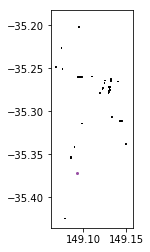

In [70]:
enveloped.plot()

In [52]:
test = GeoDataFrame(enveloped)

In [54]:
type(test)

geopandas.geodataframe.GeoDataFrame